# Calibration without observed inputs

The goal of this example is to present the calibration of a model which does not have observed inputs. In this case, there are, however, several outputs to be calibrated.

In [1]:
import openturns as ot

This model is linear in $(a, b, c)$ and identifiable.
It is derived from the equation 

$$
y(x) = a + b x + c x^2
$$

at $x=-1.0, -0.6, -0.2, 0.2, 0.6, 1.0$. Therefore, it has 3 inputs and 6 outputs.

In [2]:
g = ot.SymbolicFunction(
    ["a", "b", "c"],
    [
        "a +  -1.0  * b +  1.0  * c",
        "a +  -0.6  * b +  0.36  * c",
        "a +  -0.2  * b +  0.04  * c",
        "a +  0.2  * b +  0.04  * c",
        "a +  0.6  * b +  0.36  * c",
        "a +  1.0  * b +  1.0  * c",
    ],
)
outputDimension = g.getOutputDimension()
outputDimension

6

In [3]:
trueParameter = ot.Point([12.0, 7.0, -8.0])
trueParameter

class=Point name=Unnamed dimension=3 values=[12,7,-8]

In [4]:
Theta1 = ot.Dirac(trueParameter[0])
Theta2 = ot.Dirac(trueParameter[1])
Theta3 = ot.Dirac(trueParameter[2])

inputRandomVector = ot.ComposedDistribution([Theta1, Theta2, Theta3])

The candidate value is chosen to be different to the true parameter value. 

In [5]:
candidate = ot.Point([8.0, 9.0, -6.0])
calibratedIndices = [0, 1, 2]
model = ot.ParametricFunction(g, calibratedIndices, candidate)

We consider a multivariate gaussian noise with zero mean, standard deviation equal to 0.05 and independent copula. The independent copula implies that the errors of the 6 outputs are independent.

In [6]:
outputObservationNoiseSigma = 1.0
meanNoise = ot.Point(outputDimension)
covarianceNoise = ot.Point(outputDimension, outputObservationNoiseSigma)
R = ot.IdentityMatrix(outputDimension)
observationOutputNoise = ot.Normal(meanNoise, covarianceNoise, R)
observationOutputNoise

class=Normal name=Normal dimension=6 mean=class=Point name=Unnamed dimension=6 values=[0,0,0,0,0,0] sigma=class=Point name=Unnamed dimension=6 values=[1,1,1,1,1,1] correlationMatrix=class=CorrelationMatrix dimension=6 implementation=class=MatrixImplementation name=Unnamed rows=6 columns=6 values=[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1]

Finally, the generate the outputs by evaluating the exact outputs of the function and adding the noise. We use a sample with size equal to 5.

In [7]:
size = 5
# Generate exact outputs
inputSample = inputRandomVector.getSample(size)
outputStress = g(inputSample)
# Add noise
sampleNoise = observationOutputNoise.getSample(size)
outputObservations = outputStress + sampleNoise

We are now ready to perform the calibration. Notice that we use the constructor without input observations.

In [8]:
algo = ot.LinearLeastSquaresCalibration(
    model, outputObservations, candidate, "SVD"
)
algo.run()
calibrationResult = algo.getResult()

In [9]:
parameterMAP = calibrationResult.getParameterMAP()
parameterMAP

class=Point name=Unnamed dimension=3 values=[12.2026,7.05271,-8.63656]

We observe that the estimated parameter is relatively close to the true parameter value.

In [10]:
parameterMAP - trueParameter

class=Point name=Unnamed dimension=3 values=[0.202567,0.0527063,-0.636555]

## Graphical validation

We now validate the calculation by drawing the exact function and compare it to the function with estimated parameters.

In [11]:
fullModel = ot.SymbolicFunction(["a", "b", "c", "x"], ["a + b * x + c * x^2"])
parameterIndices = [0, 1, 2]

In [12]:
trueFunction = ot.ParametricFunction(fullModel, parameterIndices, trueParameter)
trueFunction

class=FunctionImplementation name=Unnamed description=[x,y0] evaluationImplementation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[12,7,-8] input positions=[3] gradientImplementation=class=ParametricGradient evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[12,7,-8] input positions=[3] hessianImplementation=class=ParametricHessian evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[12,7,-8] input positions=[3]

In [13]:
beforeCalibrationFunction = ot.ParametricFunction(fullModel, parameterIndices, candidate)
beforeCalibrationFunction

class=FunctionImplementation name=Unnamed description=[x,y0] evaluationImplementation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[8,9,-6] input positions=[3] gradientImplementation=class=ParametricGradient evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[8,9,-6] input positions=[3] hessianImplementation=class=ParametricHessian evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[8,9,-6] input positions=[3]

In [14]:
calibratedFunction = ot.ParametricFunction(fullModel, parameterIndices, parameterMAP)
calibratedFunction

class=FunctionImplementation name=Unnamed description=[x,y0] evaluationImplementation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[12.2026,7.05271,-8.63656] input positions=[3] gradientImplementation=class=ParametricGradient evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[12.2026,7.05271,-8.63656] input positions=[3] hessianImplementation=class=ParametricHessian evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0] formulas=[a + b * x + c * x^2] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[12.2026,7.05271,-8.63656] input positions=[3]

In [15]:
abscissas = [-1.0, -0.6, -0.2, 0.2, 0.6, 1.0]
xmin = min(abscissas)
xmax = max(abscissas)

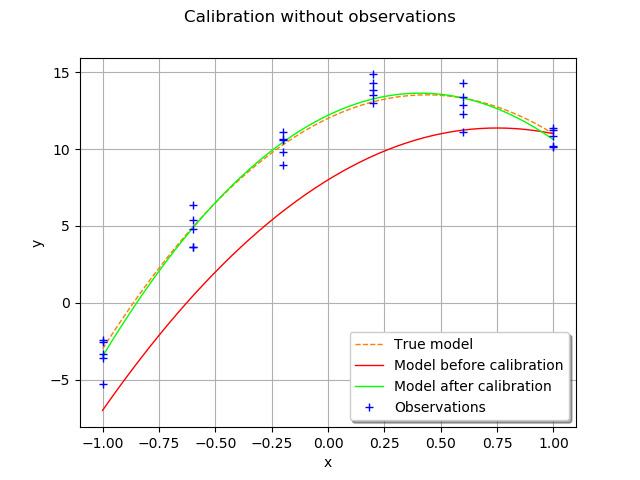

In [16]:
npoints = 50
graph = ot.Graph("Calibration without observations", "x", "y", True, "bottomright")
curve = trueFunction.draw(xmin, xmax, npoints).getDrawable(0)
curve.setLineStyle("dashed")
curve.setLegend("True model")
curve.setColor("darkorange1")
graph.add(curve)
# Before calibration
curve = beforeCalibrationFunction.draw(xmin, xmax, npoints)
curve.setLegends(["Model before calibration"])
curve.setColors(["red"])
graph.add(curve)
# After calibration
curve = calibratedFunction.draw(xmin, xmax, npoints)
curve.setLegends(["Model after calibration"])
curve.setColors(["green"])
graph.add(curve)
# Observations
for i in range(outputDimension):
    cloud = ot.Cloud(ot.Sample([abscissas[i]] * size, 1), outputObservations[:, i])
    cloud.setColor("blue")
    if i == 0:
        cloud.setLegend("Observations")
    graph.add(cloud)
graph

We notice that the calibration produces a good fit to the data with only 5 observations for each output, leading to a total of 5 (observations per output) * 6 (outputs) = 30 observations. Still, we notice a small discrepancy between the true mode land the model after calibration, but this discrepancy is very small. Actually, this was made much easier from the fact that the model is linear with respect to the calibrated parameters a, b and c.